In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Load a dataset from a CSV file
tortilla_prices_path = ('tortilla_prices.csv')

In [2]:
tortilla_df = pd.read_csv(tortilla_prices_path)

In [3]:
# Check for missing values
print(tortilla_df.isnull().sum())

State                    0
City                     0
Year                     0
Month                    0
Day                      0
Store type               0
Price per kilogram    6390
dtype: int64


In [4]:
tortilla_df.count()

State                 284394
City                  284394
Year                  284394
Month                 284394
Day                   284394
Store type            284394
Price per kilogram    278004
dtype: int64

In [5]:
# Drop missing values
tortilla_df = tortilla_df.dropna(how='any')

In [6]:
tortilla_df.count()

State                 278004
City                  278004
Year                  278004
Month                 278004
Day                   278004
Store type            278004
Price per kilogram    278004
dtype: int64

In [7]:
tortilla_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278004 entries, 0 to 284393
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               278004 non-null  object 
 1   City                278004 non-null  object 
 2   Year                278004 non-null  int64  
 3   Month               278004 non-null  int64  
 4   Day                 278004 non-null  int64  
 5   Store type          278004 non-null  object 
 6   Price per kilogram  278004 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 17.0+ MB


In [8]:
tortilla_df=tortilla_df[~tortilla_df["Year"].isna()]

In [9]:
tortilla_df[["Year","Month","Day"]]=tortilla_df[["Year","Month","Day"]].astype(int)

In [10]:
# Create a new 'date' column with the concatenated date 

tortilla_df['Date'] = tortilla_df['Month'].astype(str).str.zfill(2) + '/' + tortilla_df['Day'].astype(str).str.zfill(2) + '/' + tortilla_df['Year'].astype(str)

In [11]:
tortilla_df.head()

,State,City,Year,Month,Day,Store type,Price per kilogram,Date
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9,01/10/2007
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0,01/10/2007
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0,01/10/2007
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0,01/10/2007
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.0,01/10/2007


In [12]:
tortilla_df["Date"]=pd.to_datetime(tortilla_df["Date"])

In [13]:
tortilla_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278004 entries, 0 to 284393
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   State               278004 non-null  object        
 1   City                278004 non-null  object        
 2   Year                278004 non-null  int32         
 3   Month               278004 non-null  int32         
 4   Day                 278004 non-null  int32         
 5   Store type          278004 non-null  object        
 6   Price per kilogram  278004 non-null  float64       
 7   Date                278004 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(3), object(3)
memory usage: 15.9+ MB


In [16]:
filtered_df_complete=tortilla_df[
(tortilla_df['Year']== 2023)&
(tortilla_df['Store type']== 'Big Retail Store')&
(tortilla_df['State'].isin(['Chihuahua','Coahuila']))]

(array([1, 2]), [Text(1, 0, 'Chihuahua'), Text(2, 0, 'Coahuila')])

<Figure size 1000x600 with 0 Axes>

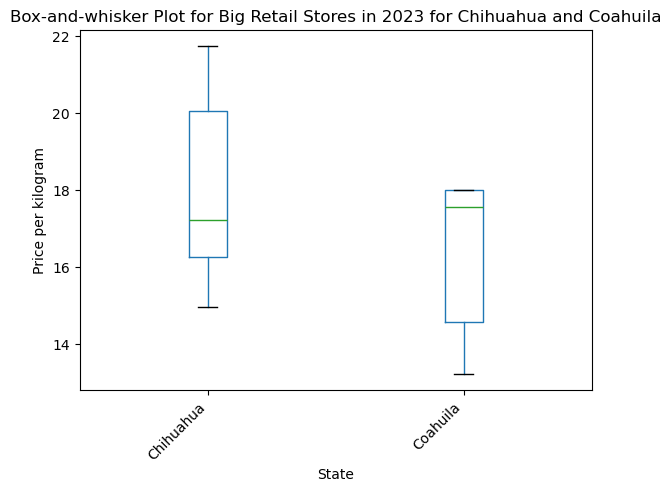

In [19]:
plt.figure(figsize=(10,6))
filtered_df_complete.boxplot(column='Price per kilogram', by='State', grid=False)
plt.title('Box-and-whisker Plot for Big Retail Stores in 2023 for Chihuahua and Coahuila')
plt.suptitle('')
plt.xlabel("State")
plt.ylabel('Price per kilogram')
plt.xticks(rotation=45, ha='right')